# ODE: more examples
From 
https://www.kau.edu.sa/Files/0060757/Subjects/Numerical%20Solution%20of%20Differential%20Equations.pdf

## 1. Chemical reactions

Suppose the following chemical reactions taking place

A->B with reaction rate 1/min

B->A with reaction rate 0/min

B->C with reaction rate 2/min

C->B with reaction rate 3/min

Initiall we only have A with abundance $C_{A}=$1.
Solve the system of ODEs for time up to 0.13 min with time internval of 0.01 min.

Solution:
\begin{eqnarray}
d C_A/dt &=& -C_A\\
d C_B/dt &=& C_A-2C_B+3C_C\\
d C_C/dt &=& 2C_B-3C_C\,.
\end{eqnarray}

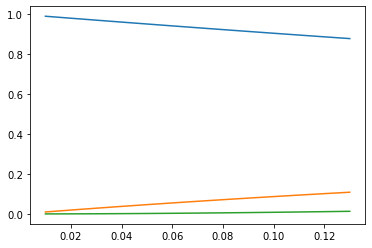

In [1]:
import numpy as np
import matplotlib.pyplot as plt


tend=0.13
h=0.01
y=[1.,0.,0.]  #y[0] is C_A, y[1] is C_B, y[2] is C_C
t=0

def f(t, y):
    f=np.zeros(3)
    # please finish f[0], f[1], f[2]
    f[0] = - y[0]
    f[1] = y[0] - 2.*y[1] + 3.*y[2]
    f[2] = 2.*y[1] - 3.*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=1./6.*(k1+2*k2+2*k3+k4)
    return y

tp=[]
y0p=[]
y1p=[]
y2p=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t, h, y, 3) # please fill in rk4 parameters
    y0p=np.append(y0p,y[0])
    y1p=np.append(y1p,y[1])
    y2p=np.append(y2p,y[2])
    t = t+h
    tp=np.append(tp,t)

plt.plot(tp,y0p)
plt.plot(tp,y1p)
plt.plot(tp,y2p)
plt.show()

## 2. higher order ODE

Please solve the following ODE
\begin{equation}
\frac{d^2x}{dt^2}+\frac{dx}{dt}+x=1
\end{equation}
with x(0)=0,x'(0)=1. Using h=0.1 for t up to 2

\begin{eqnarray}
dx/dt&=&v\\
dv/dt&=&1-x-v\,
\end{eqnarray}

x-> y[0], v -> y[1]
\begin{eqnarray}
dy[0]/dt&=&y[1]\\
dy[1]/dt&=&1-y[0]-y[1]\,,
\end{eqnarray}

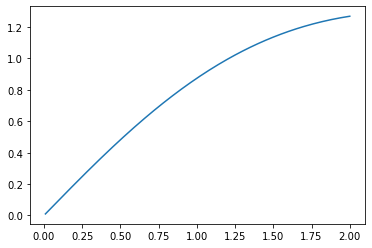

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#please finish initial condition
tend= 2
h= 0.01
y= [0, 1.] 
t=0

def f(t, y):
    f=np.zeros(2)
    f[0] = y[1]
    f[1] = 1 - y[0] - y[1]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=1./6.*(k1+2*k2+2*k3+k4)
    return y

tp=[]
y0p=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,2)
    y0p=np.append(y0p,y[0])
    t = t+h
    tp=np.append(tp,t)

plt.plot(tp,y0p)
plt.show()

In [15]:
print(tp, y0p)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12
 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26
 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4
 1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54
 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68
 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82
 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96
 1.97 1.

# Stability of ODE

Use Forward Euler methods to solve a nuclear decay equation 
\begin{equation}
dy/dt=-101*y+1
\end{equation}
Try dt=1.e-4,1.e-3,1.e-2, 1.e-1 until t=1 and plot the results with different dt but the same method in the same plot.

hint: Forward Euler, $y_{n+1}-y_{n}=(-101*y_{n}+1)*h$


<ipython-input-10-b171a18b41a4>:25: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(tp),np.log10(np.abs(y0p)))


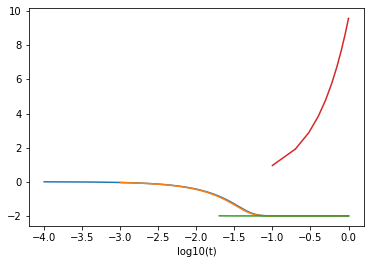

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def eu(t, h, y):
    y+= h*(-101*y + 1.) # please finish forward euler method
    return y    

tend=1.


for h in [1.e-4,1.e-3,1.e-2,1.e-1]:
    y=1.0
    t=0
    tp=[]
    y0p=[]

    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y)
        y0p=np.append(y0p,y)
        t = t+h
        tp=np.append(tp,t)

    plt.plot(np.log10(tp),np.log10(np.abs(y0p)))
    
plt.xlabel('log10(t)')
plt.show()

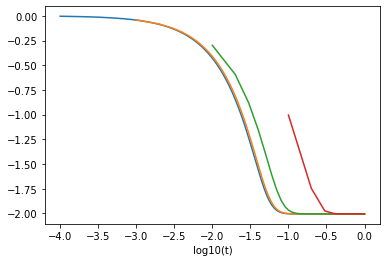

In [16]:
#Please use backward Euler method, y_{n+1}-y_{n}=(-101*y_{n+1}+1)*h

import numpy as np
import matplotlib.pyplot as plt
    
def eu(t, h, y):
    y= (y+h)/(1+101*h) # please finish backward euler method
    return y    

tend=1.


for h in [1.e-4,1.e-3,1.e-2,1.e-1]:
    y=1.0
    t=0
    tp=[]
    y0p=[]

    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y)
        y0p=np.append(y0p,y)
        t = t+h
        tp=np.append(tp,t)

    plt.plot(np.log10(tp),np.log10(np.abs(y0p)))
    
plt.xlabel('log10(t)')
plt.show()